In [35]:
#import python libraries for data manipulation and visualization
import pandas as pd # for data manipulation 
import numpy as np # for data manipulation 
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization

In [2]:
df=pd.read_csv(r'C:\data\diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe(include='all').T# Concise statistical description of numeric features

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

## Data Preprocessing - Feature Engineering - Exploratory Data Analysis

In [8]:
df.isnull().values.any() # No missing values to deal with

False

In [9]:
df.duplicated().any() # There is no duplicated features to be dropped or deal with

False

## Pandas Profiling

In [10]:
#!pip install pandas_profiling

In [12]:
from pandas_profiling import ProfileReport
#import sweetviz as sv 

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
profile = ProfileReport(df, title="Diabetes Classification")
profile

## Correlation Matrix For Numeric Features

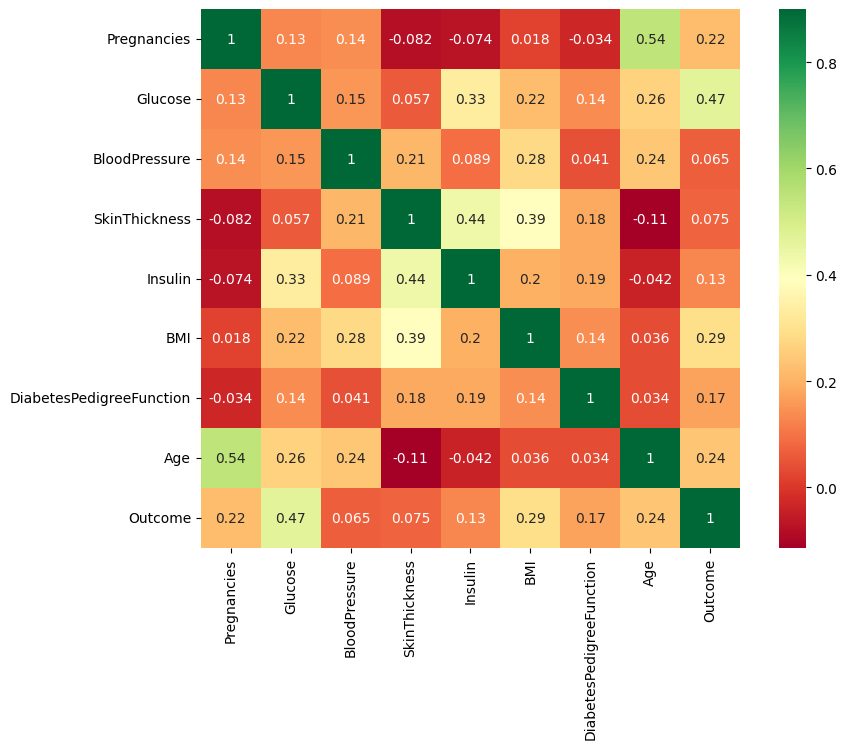

In [11]:
corrmat = df.corr()
plt.subplots(figsize=(10,7))
sns.heatmap(corrmat, annot=True, vmax=0.9, square=True,cmap='RdYlGn')
plt.show();

## Distrubution Plots for Numeric Feature

* Distribution of numeric features are different from each other. Some of the features normally distributed (e.g 'Glucose' and 'BMI') whereas some have skewed distributions

In [ ]:
f,ax=plt.subplots(3,3,figsize=(19,6),constrained_layout = True)
sns.distplot(df["Pregnancies"],bins=20,ax=ax[0,0],color='orange');

sns.distplot(df["Glucose"],bins=20,ax=ax[0,1],color='orange');

sns.distplot(df["BloodPressure"],bins=20,ax=ax[0,2],color='orange');

sns.distplot(df["SkinThickness"],bins=20,ax=ax[1,0],color='red');

sns.distplot(df["Insulin"],bins=20,ax=ax[1,1],color='red');

sns.distplot(df["BMI"],bins=20,ax=ax[1,2],color='red');

sns.distplot(df["DiabetesPedigreeFunction"],bins=20,ax=ax[2,0],color='black');

sns.distplot(df["Age"],bins=20,ax=ax[2,1],color='black');

sns.distplot(df["Outcome"],bins=20,ax=ax[2,2],color='black');

# Analysis of 'Outcome' Feature

In [ ]:
sns.countplot(data=df, x='Outcome');
print(df.Outcome.value_counts())

In [ ]:
sns.pairplot(df, hue="Outcome",height=1.5);
plt.show();

In [12]:
# Success metrics for the models
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix,f1_score,roc_curve,roc_auc_score
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features 
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV #splitting the dataset into test-train
#from pandas_profiling import ProfileReport

In [13]:
#Algorithms for using supervised learning methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

##  Applying Normalization
 * Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include    scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the        -  variable so the variable values range from 0 to 1.
*  In our example, Min-Max Scaling technique is applied.'''

In [ ]:
df.columns

In [ ]:
transformer = MinMaxScaler()
def scaling(columns):
    return transformer.fit_transform(df[columns].values.reshape(-1,1))

columns_to_be_scaled = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                        'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for i in columns_to_be_scaled:
    df[i] = scaling(i)
    
df.head()

## Machine Learning Modeling


### Train - Test Split
    * Train dataset is split into test-train parts to be able to use in ML algorithms.
    * 70% for training and 30% for testing

In [14]:
y=df["Outcome"] #output column
X=df.drop(["Outcome"],axis=1) #train columns
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=42)

In [ ]:

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Deep Learning


In [15]:
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [17]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_trainf=std.fit_transform(X_train)
x_testf=std.transform(X_test)

In [18]:
model=Sequential()
model.add(Dense(3,activation="relu",kernel_initializer="he_uniform",input_dim=2))
model.add(Dense(2,activation="relu",kernel_initializer="he_uniform"))
model.add(Dense(1,activation="sigmoid"))

In [19]:
wei=model.get_weights()

In [20]:
wei

[array([[ 0.5897664 , -0.74101   , -0.25535202],
        [-0.35020244, -0.29804718, -0.5235828 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.34174657, -1.0496598 ],
        [-0.6142603 ,  0.7121073 ],
        [-0.6698766 , -1.3048576 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.6656598],
        [-0.5617207]], dtype=float32),
 array([0.], dtype=float32)]

In [21]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [30]:
x_train_f=x_trainf.flatten()

In [32]:
x_train_f

array([-0.8362943 , -0.80005088, -0.53576428, ..., -1.24394334,
       -0.60836445, -1.03426754])

In [33]:
history=model.fit(x_train_f,y_train,batch_size=1,epochs=50,validation_split=0.2)

ValueError: Data cardinality is ambiguous:
  x sizes: 3436
  y sizes: 537
Make sure all arrays contain the same number of samples.